In [139]:
import os
import pandas as pd
import numpy as np 


from Bio import Entrez
from Bio import SeqIO


from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster

from sklearn.cluster import AgglomerativeClustering


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

### Credits: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

In [35]:
distance_file = '/home/pjsola/Develop/PJSC_utils/data/ECO30_90.mash.distance.tab'

In [63]:
df = pd.read_csv(distance_file, sep='\t', names=['reference_ID', 'query_ID', 'distance', 'p_value', 'shared_hashes'])

In [37]:
df.shape

(1089, 5)

In [38]:
df.head(20)

,reference_ID,query_ID,distance,p_value,shared_hashes
0,NZ_CP015021.1,NZ_CP015021.1,0.000000,0.0,1000/1000
1,NZ_CP015022.1,NZ_CP015021.1,0.004643,0.0,830/1000
2,NZ_CP015856.1,NZ_CP015021.1,0.004800,0.0,825/1000
3,K00826.1,NZ_CP015021.1,1.000000,1.0,0/1000
4,NZ_CP017252.1,NZ_CP015021.1,0.004674,0.0,829/1000
5,NZ_CP017670.1,NZ_CP015021.1,0.004737,0.0,827/1000
6,NZ_CP018238.1,NZ_CP015021.1,0.003344,0.0,873/1000
7,NZ_CP018240.1,NZ_CP015021.1,0.002998,0.0,885/1000
8,NZ_CP018246.1,NZ_CP015021.1,0.003141,0.0,880/1000
9,NZ_CP018244.1,NZ_CP015021.1,0.003170,0.0,879/1000


In [39]:
#df.to_dict('records')

In [40]:
dfpair = df[['reference_ID', 'query_ID', 'distance']]

In [41]:
dist_matrix = dfpair.groupby(['reference_ID', 'query_ID']).mean().unstack()

In [42]:
dist_matrix.shape

(33, 33)

In [43]:
dist_matrix.head()

distance                                            \
query_ID          K00826.1 NC_007414.1 NC_013010.1 NZ_AVCD01000003.1   
reference_ID                                                           
K00826.1           0.0      1.000000    1.000000    1.000000           
NC_007414.1        1.0      0.000000    0.002162    0.002271           
NC_013010.1        1.0      0.002162    0.000000    0.000410           
NZ_AVCD01000003.1  1.0      0.002271    0.000410    0.000000           
NZ_CM007618.1      1.0      0.002743    0.001083    0.001109           

                                                                           \
query_ID          NZ_CM007618.1 NZ_CM007785.1 NZ_CM007786.1 NZ_CM007787.1   
reference_ID                                                                
K00826.1           1.000000      1.000000      1.000000      1.000000       
NC_007414.1        0.002743      0.046501      0.025812      0.076299       
NC_013010.1        0.001083      0.045035      0.025241      0.075541       
NZ_AVCD01000003.1  0.001109      0.044718      0.025000      0.075918       
NZ_CM007618.1      0.000000      0.045194      0.024604      0.074799       

                                                                           \
query_ID          NZ_CM007788.1 NZ_CP006633.1 NZ_CP010305.1 NZ_CP015021.1   
reference_ID                                                                
K00826.1           1.000000      1.0           1.000000      1.000000       
NC_007414.1        0.035157      1.0           0.002189      0.004832       
NC_013010.1        0.034248      1.0           0.000024      0.003141       
NZ_AVCD01000003.1  0.033366      1.0           0.000434      0.003460       
NZ_CM007618.1      0.033804      1.0           0.001109      0.003966       

                                                                           \
query_ID          NZ_CP015022.1 NZ_CP015816.1 NZ_CP015847.2 NZ_CP015856.1   
reference_ID                                                                
K00826.1           1.000000      1.000000      1.000000      1.000000       
NC_007414.1        0.000144      0.002271      0.002326      0.000313       
NC_013010.1        0.002000      0.000096      0.000459      0.002135       
NZ_AVCD01000003.1  0.002108      0.000508      0.000192      0.002244       
NZ_CM007618.1      0.002630      0.001083      0.001160      0.002714       

                                                                           \
query_ID          NZ_CP016626.1 NZ_CP017252.1 NZ_CP017435.1 NZ_CP017437.1   
reference_ID                                                                
K00826.1           1.000000      1.000000      1.000000      1.000000       
NC_007414.1        0.002326      0.000168      0.002714      0.002714       
NC_013010.1        0.000459      0.002027      0.001058      0.001058       
NZ_AVCD01000003.1  0.000192      0.002135      0.001083      0.001083       
NZ_CM007618.1      0.001160      0.002658      0.000024      0.000024       

                                                                           \
query_ID          NZ_CP017439.1 NZ_CP017670.1 NZ_CP018238.1 NZ_CP018240.1   
reference_ID                                                                
K00826.1           1.000000      1.000000      1.000000      1.000000       
NC_007414.1        0.002714      0.000216      0.002162      0.002000       
NC_013010.1        0.001058      0.002081      0.000656      0.000288       
NZ_AVCD01000003.1  0.001083      0.002189      0.000731      0.000557       
NZ_CM007618.1      0.000024      0.002658      0.001211      0.000982       

                                                                           \
query_ID          NZ_CP018242.1 NZ_CP018244.1 NZ_CP018246.1 NZ_CP018248.1   
reference_ID                                                                
K00826.1           1.000000      1.000000      1.000000      1.000000       
NC_007414.1        0.002000      0.001973      0

In [44]:
dist_matrix.columns[0:5]

MultiIndex([('distance',          'K00826.1'),
            ('distance',       'NC_007414.1'),
            ('distance',       'NC_013010.1'),
            ('distance', 'NZ_AVCD01000003.1'),
            ('distance',     'NZ_CM007618.1')],
           names=[None, 'query_ID'])

In [45]:
dist_matrix.index[0:5]

Index(['K00826.1', 'NC_007414.1', 'NC_013010.1', 'NZ_AVCD01000003.1',
       'NZ_CM007618.1'],
      dtype='object', name='reference_ID')

### Drop level 0 (multiindex) equivalent to distance

In [46]:
#df.columns = [col[1] for col in df.columns]
dist_matrix = dist_matrix.droplevel(0, axis=1)

In [47]:
dist_matrix.columns[0:5]

Index(['K00826.1', 'NC_007414.1', 'NC_013010.1', 'NZ_AVCD01000003.1',
       'NZ_CM007618.1'],
      dtype='object', name='query_ID')

In [48]:
samples_test = ['K00826.1', 'NZ_CP018246.1', 'NZ_CP018248.1' ]

In [49]:
dist_matrix.loc[samples_test,samples_test]

query_ID,K00826.1,NZ_CP018246.1,NZ_CP018248.1
reference_ID,,,
K00826.1,0.0,1.000000,1.000000
NZ_CP018246.1,1.0,0.000000,0.001007
NZ_CP018248.1,1.0,0.001007,0.000000


In [50]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/home/pjsola/.conda/envs/develop/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


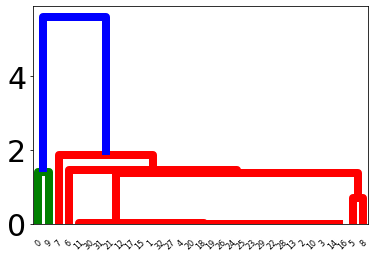

In [51]:
dendro = hierarchy.dendrogram(Z)

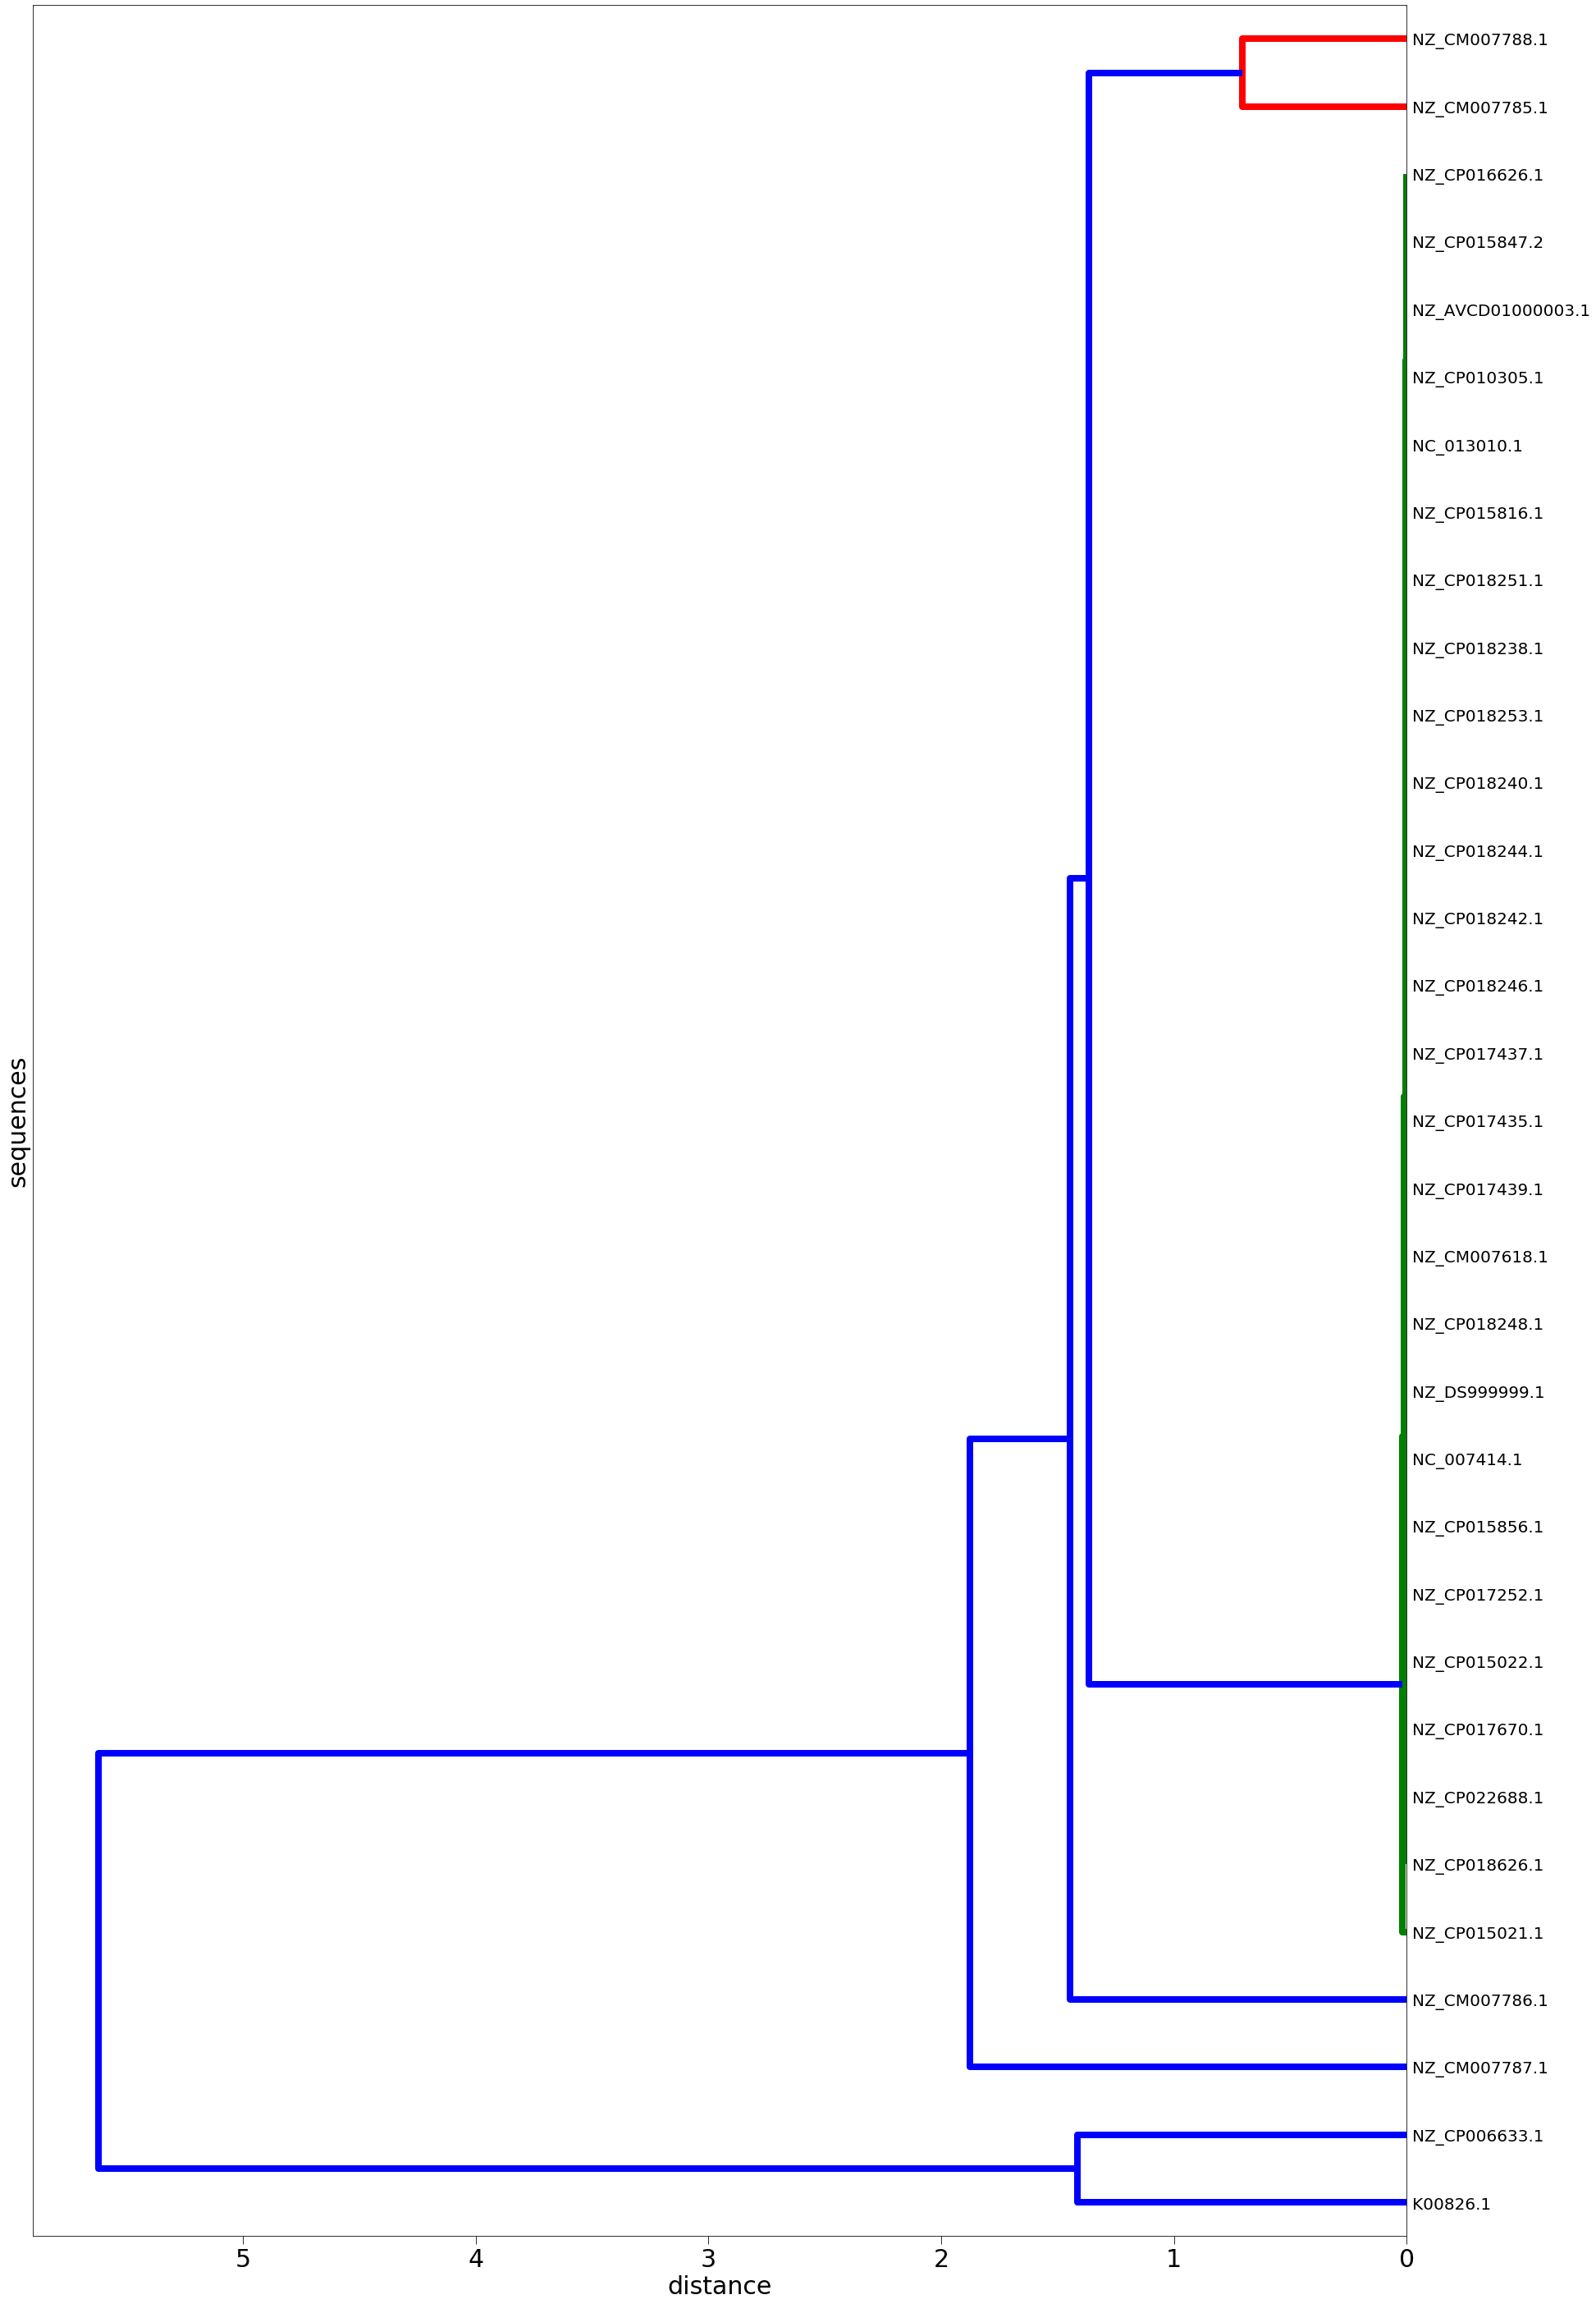

In [55]:
labelList = dist_matrix.columns.tolist()
plt.rcParams['lines.linewidth'] = 8 #Dendrogram line with
plt.rcParams['xtick.major.size'] = 10 #Only affect to tick (line) size
plt.rcParams.update({'font.size': 30}) #Increase x tick label size
#plt.tick_params(labelsize=30)
plt.figure(figsize=(30, 50))
plt.ylabel('sequences', fontsize=30)
plt.xlabel('distance', fontsize=30)

hierarchy.dendrogram(Z, labels=labelList, orientation='left', distance_sort='descending', show_leaf_counts=True, color_threshold=1, leaf_font_size=20)

plt.show
plt.savefig('test_plasmid_distance.png', format="png")
plt.savefig('test_plasmid_distance.svg', format="svg")

In [57]:
#sns.clustermap(dist_matrix, cmap="YlGnBu", figsize=(20, 20))

In [90]:
max_d = 1
clusters_scipy = fcluster(Z, max_d, criterion='distance')

In [91]:
clusters_scipy

array([1, 3, 3, 3, 3, 4, 5, 6, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [92]:
df_cl_scy = pd.DataFrame()
df_cl_scy['aacc'] =  dist_matrix.index
df_cl_scy['cluster'] = clusters_scipy

In [118]:
#df_cl_scy.sort_values(by=['cluster'])
df_cl_scy

,aacc,cluster
0,K00826.1,1
1,NC_007414.1,3
2,NC_013010.1,3
3,NZ_AVCD01000003.1,3
4,NZ_CM007618.1,3
5,NZ_CM007785.1,4
6,NZ_CM007786.1,5
7,NZ_CM007787.1,6
8,NZ_CM007788.1,4
9,NZ_CP006633.1,2


In [133]:
def acc_to_len_id(row):
    accession_number = row.aacc
    Entrez.email = "A.N.Other@example.com"
    try:
        handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")
        record = SeqIO.read(handle, "fasta")
        handle.close()
        #print("Downloaded: " + record.description)
        #print("Downloaded: " + str(len(record)))
        #return record
        description = ' '.join(record.description.split()[3:])
        species = ' '.join(record.description.split()[1:3])
        return len(record), species, description
    except:
        print(record.id + " failed to download")
        sys.exit(1)
    
    '''    
    #SeqIO.write(record, output_handle, "fasta")
    '''

In [134]:
#acc_to_len_id('K00826.1')

In [135]:
df_cl_scy[['length', 'species', 'description']] = df_cl_scy.apply(acc_to_len_id, axis=1, result_type="expand")

In [132]:
df_cl_scy

,aacc,cluster,length,species,description
0,K00826.1,1,4012,Escherichia coli,plasmid pCM959 complete sequence
1,NC_007414.1,3,92077,Escherichia coli,"O157:H7 str. EDL933 plasmid pO157, complete sequence"
2,NC_013010.1,3,94601,Escherichia coli,"O157:H7 str. TW14359 plasmid pO157, complete sequence"
3,NZ_AVCD01000003.1,3,98062,Escherichia coli,"O157:H7 str. F8092B plasmid pO157, whole genome shotgun sequence"
4,NZ_CM007618.1,3,92545,Escherichia coli,"O157:H7 strain 1175 plasmid pO157, whole genome shotgun sequence"
5,NZ_CM007785.1,4,23446,Escherichia coli,"O157:H7 strain LEN02-0647-1 plasmid p_IncFIA, whole genome shotgun sequence"
6,NZ_CM007786.1,5,38633,Escherichia coli,"O157:H7 strain LEN02-0647-1 plasmid p_IncFIB, whole genome shotgun sequence"
7,NZ_CM007787.1,6,9382,Escherichia coli,"O157:H7 strain LEN02-0647-1 plasmid p_IncFII, whole genome shotgun sequence"
8,NZ_CM007788.1,4,32634,Escherichia coli,"O157:H7 strain LEN02-9121-1 plasmid p_IncFIA, whole genome shotgun sequence"
9,NZ_CP006633.1,2,3319,Escherichia coli,"PCN033 plasmid p1PCN033, complete sequence"


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

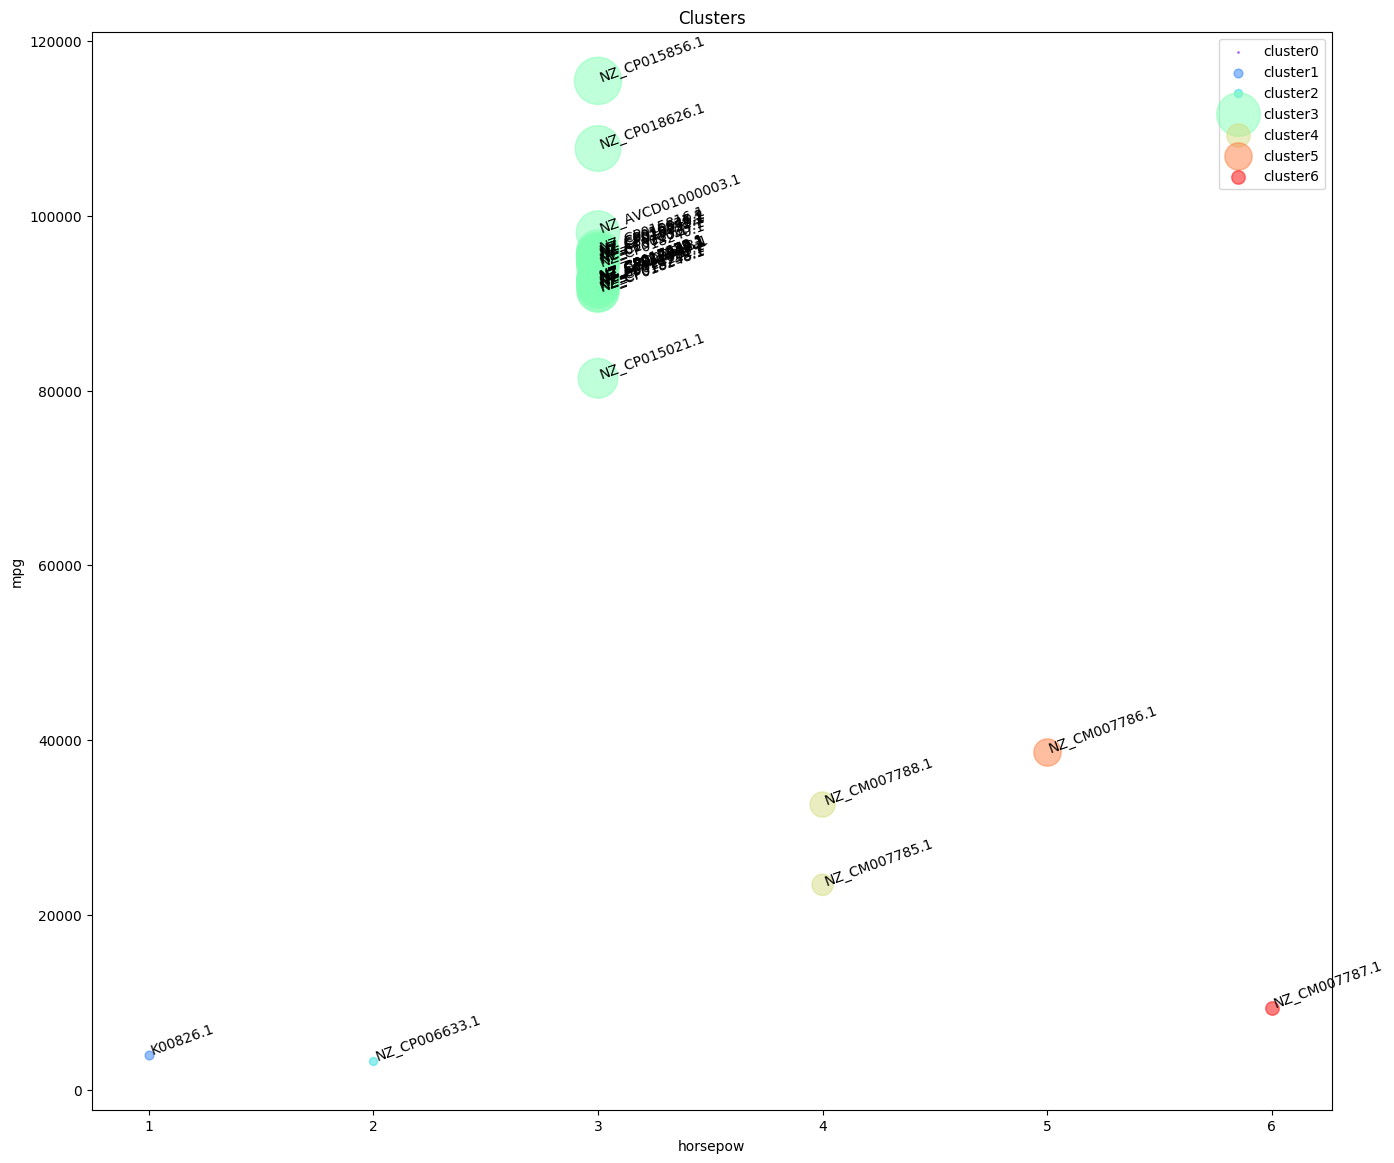

In [148]:
plt.rcParams.update(plt.rcParamsDefault)

n_clusters = len(df_cl_scy.cluster.unique()) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Crear una figura de 6 pulgadas (aprox 15cm) por 4 pulgadas (aprox 10cm).
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df_cl_scy[df_cl_scy.cluster == label]
    for i in subset.index:
            plt.text(subset.cluster[i], subset.length[i],str(subset['aacc'][i]), rotation=20) 
    plt.scatter(subset.cluster, subset.length, s= subset.length/100, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

## Clustering using scikit-learn


In [157]:
agglom = AgglomerativeClustering(distance_threshold = 1, n_clusters = None, linkage = 'complete')
agglom.fit(dist_matrix)
clusters_scikit = agglom.labels_
clusters_scikit

/home/pjsola/.conda/envs/develop/lib/python3.6/site-packages/sklearn/cluster/_agglomerative.py:468: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([4, 2, 2, 2, 2, 0, 3, 5, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [158]:
df_cl_scyk = pd.DataFrame()
df_cl_scyk['aacc'] =  dist_matrix.index
df_cl_scyk['cluster'] = clusters_scikit

In [160]:
df_cl_scyk.head()

,aacc,cluster
0,K00826.1,4
1,NC_007414.1,2
2,NC_013010.1,2
3,NZ_AVCD01000003.1,2
4,NZ_CM007618.1,2


In [161]:
df_cl_scyk[['length', 'species', 'description']] = df_cl_scyk.apply(acc_to_len_id, axis=1, result_type="expand")

In [162]:
df_cl_scyk

,aacc,cluster,length,species,description
0,K00826.1,4,4012,Escherichia coli,plasmid pCM959 complete sequence
1,NC_007414.1,2,92077,Escherichia coli,"O157:H7 str. EDL933 plasmid pO157, complete sequence"
2,NC_013010.1,2,94601,Escherichia coli,"O157:H7 str. TW14359 plasmid pO157, complete sequence"
3,NZ_AVCD01000003.1,2,98062,Escherichia coli,"O157:H7 str. F8092B plasmid pO157, whole genome shotgun sequence"
4,NZ_CM007618.1,2,92545,Escherichia coli,"O157:H7 strain 1175 plasmid pO157, whole genome shotgun sequence"
5,NZ_CM007785.1,0,23446,Escherichia coli,"O157:H7 strain LEN02-0647-1 plasmid p_IncFIA, whole genome shotgun sequence"
6,NZ_CM007786.1,3,38633,Escherichia coli,"O157:H7 strain LEN02-0647-1 plasmid p_IncFIB, whole genome shotgun sequence"
7,NZ_CM007787.1,5,9382,Escherichia coli,"O157:H7 strain LEN02-0647-1 plasmid p_IncFII, whole genome shotgun sequence"
8,NZ_CM007788.1,0,32634,Escherichia coli,"O157:H7 strain LEN02-9121-1 plasmid p_IncFIA, whole genome shotgun sequence"
9,NZ_CP006633.1,1,3319,Escherichia coli,"PCN033 plasmid p1PCN033, complete sequence"


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

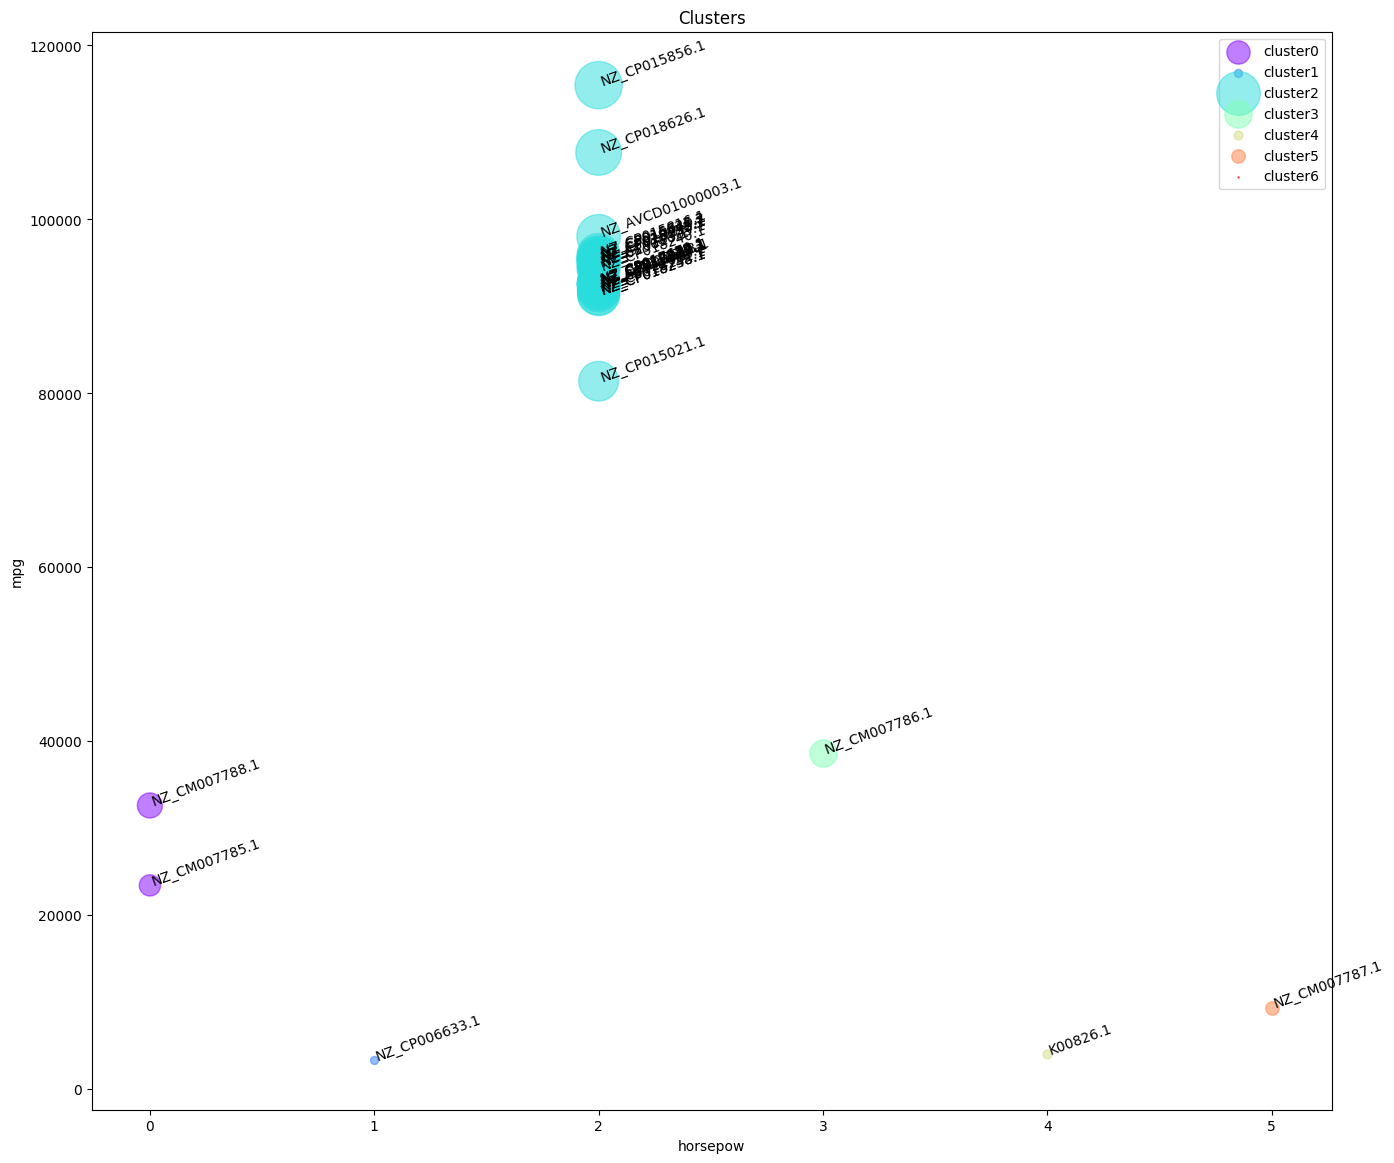

In [163]:
plt.rcParams.update(plt.rcParamsDefault)

n_clusters = len(df_cl_scyk.cluster.unique()) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Crear una figura de 6 pulgadas (aprox 15cm) por 4 pulgadas (aprox 10cm).
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df_cl_scyk[df_cl_scyk.cluster == label]
    for i in subset.index:
            plt.text(subset.cluster[i], subset.length[i],str(subset['aacc'][i]), rotation=20) 
    plt.scatter(subset.cluster, subset.length, s= subset.length/100, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')